In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tdc
import MDAnalysis as md

In [2]:
monomer = tdc.freq("formamide_monomer_tdc_calc.log")

In [3]:
modes = [7,8,9]
monomer.select_modes(modes)

In [4]:
print("Selected monomer frequencies:", monomer.frequencies)
print("Selected monomer IR intesities:",monomer.irIntensities)

Selected monomer frequencies: [1640.5185 1847.0619 2995.6147]
Selected monomer IR intesities: [ 68.2398 357.1644 111.0677]


In [5]:
coord = md.Universe("../formamide_dimer.pdb")

In [6]:
tdcDimer = tdc.tdc(monomer,coord.atoms.positions)

In [7]:
print("TDC Dimer frequencies:", tdcDimer.frequencies)
print("TDC Dimer IR intensities:", tdcDimer.irIntensities)

TDC Dimer frequencies: [1640.04608412 1640.97708332 1844.88048386 1849.25499214 2995.16827175
 2995.99018938]
TDC Dimer IR intensities: [ 19.66290544 114.61553136 104.73504566 611.26949043  32.7723682
 189.89139608]


In [8]:
dftDimer = tdc.freq("../formamide_wb97xd.dimer_freq.log")
dimerModes = [20,21,22,23,24,25]
dftDimer.select_modes(dimerModes)

In [9]:
print("DFT Dimer frequencies:", dftDimer.frequencies)
print("DFT Dimer IR intensities:",dftDimer.irIntensities)

DFT Dimer frequencies: [1653.2452 1654.0593 1840.088  1846.1611 3013.0919 3028.8451]
DFT Dimer IR intensities: [ 44.977   91.9314 139.9487 783.8467  96.8916  94.411 ]


(0, 200)

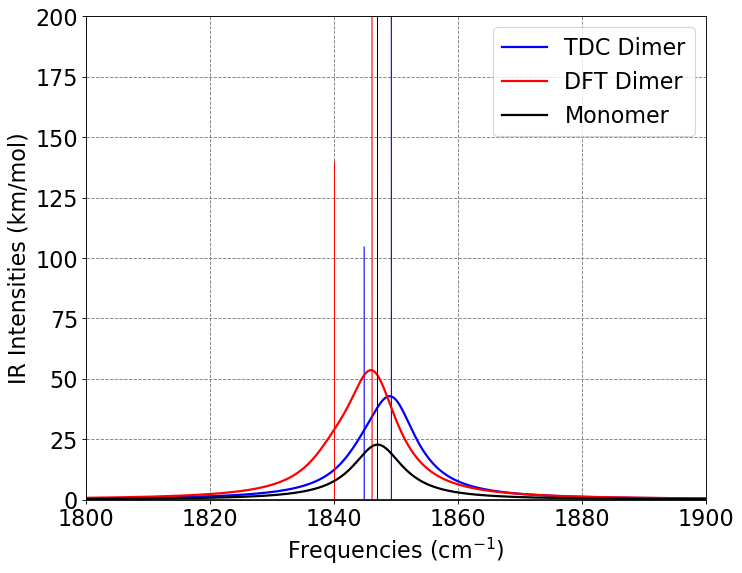

In [10]:
fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("Frequencies (cm$^{-1}$)",size=20)
ax.set_ylabel("IR Intensities (km/mol)",size=20)
plt.tick_params(axis='both',labelsize=20)
tdcSticks = tdcDimer.sticks()
tdcLorentz = tdcDimer.lorentzian_convolution()
dftSticks = dftDimer.sticks()
dftLorentz = dftDimer.lorentzian_convolution()
monomerSticks = monomer.sticks()
monomerLorentz = monomer.lorentzian_convolution()
ax.plot(tdcSticks[:,0],tdcSticks[:,1],c="b",lw=0.5)
ax.plot(tdcLorentz[:,0],tdcLorentz[:,1],c="b",lw=2,label="TDC Dimer")
ax.plot(dftSticks[:,0],dftSticks[:,1],c="r",lw=0.5)
ax.plot(dftLorentz[:,0],dftLorentz[:,1],c="r",lw=2,label="DFT Dimer")
ax.plot(monomerSticks[:,0],monomerSticks[:,1],c="k",lw=0.5)
ax.plot(monomerLorentz[:,0],monomerLorentz[:,1],c="k",lw=2,label="Monomer")
plt.legend(fontsize=20)
plt.xlim(1800,1900)
plt.ylim(0,200)